In [70]:
class NODES:
    N:int
    dx:float
    iters:int
    state = {"euler":{}, "rk2":{}, "rk3":{}, "rk4":{}}
    evolvers = {}
    state_history = {"euler":{}, "rk2":{}, "rk3":{}, "rk4":{}}
    errors = {"euler":[], "rk2":[], "rk3":[], "rk4":[]}
    actual = []

    def __init__(self, N, dx, iters, state, evolvers, actualf=lambda x:0):
        self.N = N
        self.dx = dx
        self.iters = iters

        for method in self.state:
            self.state[method] = state

        self.evolvers = evolvers

        for method in self.state_history:
            self.state_history[method]["x"] = []
            for i in range(0, self.N):
                self.state_history[method][f"y{i}"] = []

        self.actual = []
        for i in range(0, self.iters):
            for method in self.state_history:
                for yn in self.state_history[method]:
                    self.state_history[method][yn].append(self.state[method][yn])

            self.actual.append(actualf(self.state["rk4"]["x"]))
            self.state["rk4"] = self.rk4(self.state["rk4"].copy())
            self.state["euler"] = self.euler(self.state["euler"].copy())
            self.state["rk3"] = self.rk3(self.state["rk3"].copy())
            self.state["rk2"] = self.rk2(self.state["rk2"].copy())

        for method in self.errors:
            self.errors[method] = []
            for i in range(0, len(self.actual)):
                self.errors[method].append(self.state_history[method]["y0"][i] - self.actual[i])

    def rk2(self, state):
        _temp = {}
        G1, G2 = {}, {}
        Gs = [G1, G2]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k!="x"}
            if idx == 1:
                Gsw = 0.5
                _temp = {k:v + self.dx*Gsw*Gs[idx - 1][k] for k,v in state.items() if k!="x"}
            _temp["x"] = state["x"] + Gsw*self.dx

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/2)*(Gs[0][yn] + Gs[1][yn])

        return state

    def rk3(self, state):
        _temp = {}
        G1, G2, G3 = {}, {}, {}
        Gs = [G1, G2, G3]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k!="x"}
            if idx == 1:
                Gsw = 0.5
                _temp = {k:v + self.dx*Gsw*Gs[idx - 1][k] for k,v in state.items() if k!="x"}
            if idx == 2: 
                Gsw = 1
                _temp = {k:v + self.dx*Gsw*(2*Gs[idx - 1][k] - Gs[idx - 2][k]) for k,v in state.items() if k!="x"}
            _temp["x"] = state["x"] + Gsw*self.dx

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/6)*(Gs[0][yn] + 4*Gs[1][yn] + Gs[2][yn])

        return state
    
    def rk4(self, state):
        _temp = {}
        G1, G2, G3, G4 = {}, {}, {}, {}
        Gs = [G1, G2, G3, G4]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k!="x"}
            else:
                Gsw = 0.5
                if idx == 4: Gsw = 1
                _temp = {k:v + self.dx*Gsw*Gs[idx - 1][k] for k,v in state.items() if k!="x"}
            _temp["x"] = state["x"] + Gsw*self.dx

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/6)*(Gs[0][yn] + 2*Gs[1][yn] + 2*Gs[2][yn] + Gs[3][yn])

        return state

    def euler(self, state):
        for yn in state:
            exec(f"{yn}=state[yn]")
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += self.dx*eval(self.evolvers[yn])
        return state



<function matplotlib.pyplot.show(close=None, block=None)>

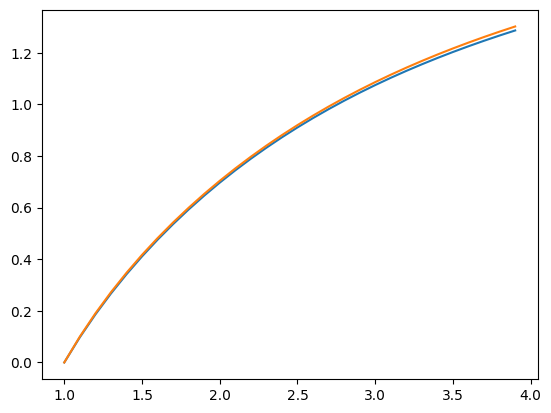

In [71]:
nodes = NODES(2, 0.1, 30, {"x":1, "y0":0, "y1":1}, {"y0": "y1", "y1":"(2*y0/x)-(x*y1)"})

import matplotlib.pyplot as plt
#plt.plot(nodes.state_history["rk4"]["x"], nodes.state_history["rk4"]["y0"])
#plt.plot(nodes.state_history["euler"]["x"], nodes.state_history["euler"]["y0"])
#plt.plot(nodes.state_history["rk3"]["x"], nodes.state_history["rk3"]["y0"])
#plt.plot(nodes.state_history["rk3"]["x"], nodes.state_history["rk3"]["y0"])
#plt.plot(nodes.state_history["rk3"]["x"], nodes.errors["rk4"])
plt.plot(nodes.state_history["rk3"]["x"], nodes.errors["rk2"])
plt.plot(nodes.state_history["rk3"]["x"], nodes.errors["euler"])




plt.show